In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 ' Linux'로 확인
    
    if system_name == 'Darwin':
        font_family = 'AppleGothic'
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야 한다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐
        !apt-get update -qq
        !apt-get install fonts-nanum -qq > /dev/null
        
        import matplotlib.font_manager as fm
        
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = 'NanumBarunGothic'
    return font_family

font_family = get_font_family()

# 그래프 스타일 설정
# 그래프 스타일을 밑에서 설정하면 폰트가 깨진다
plt.style.use('dark_background')
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스 폰트 설정
plt.rc('axes', unicode_minus=False)


df = pd.read_csv('eft_2021-09-04.csv', dtype={'종목코드': object})
df.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
0,069500,1,KODEX 200,41930,2,270,0.65,41979.0,-3.1976,2807005,117551,54593,국내 시장지수,KODEX,False,False,False
1,102110,1,TIGER 200,41960,2,270,0.65,42009.0,-3.1484,992124,41597,23225,국내 시장지수,TIGER,False,False,False
2,153130,6,KODEX 단기채권,102885,2,10,0.01,102883.0,0.0291,7598,781,20968,채권,KODEX,False,False,False
3,252670,3,KODEX 200선물인버스2X,2000,5,-25,-1.23,2004.0,5.2631,113442718,227795,20042,국내 파생,KODEX,True,False,False
4,371460,4,TIGER 차이나전기차SOLACTIVE,16480,5,-670,-3.91,NaN,26.3319,12395343,207101,18702,해외 주식,TIGER,False,False,False


In [ ]:
corr = df.corr()
corr

In [ ]:
#lower triangle of an array
#mask = np.tril(np.ones_like(corr))

#upper triangle of an array
mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(10,10))
# 삼각형 윗부분만 표시                               마스킹한다 = 가린다
sns.heatmap(corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1, mask=mask)

In [ ]:
sns.regplot(data=df, x='전일비', y='등락률', ci=None)

In [ ]:
sns.regplot(data=df, x='현재가', y='순자산가치(NAV)', ci=None)

In [ ]:
sns.regplot(data=df, x='등락구분', y='등락률', ci=None)

In [ ]:
sns.regplot(data=df, y='등락구분', x='등락률', ci=None)

In [8]:
df_num = df.select_dtypes(exclude=np.object).copy()
df_num['종목명'] = df['종목명']
df_num = df_num.set_index('종목명')
df_num

C:\Users\ysn65\AppData\Local\Temp/ipykernel_4472/3726768569.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_num = df.select_dtypes(exclude=np.object).copy()


,탭코드,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),인버스,레버리지,환헤지H
종목명,,,,,,,,,,,,,
KODEX 200,1,41930,2,270,0.65,41979.0,-3.1976,2807005,117551,54593,False,False,False
TIGER 200,1,41960,2,270,0.65,42009.0,-3.1484,992124,41597,23225,False,False,False
KODEX 단기채권,6,102885,2,10,0.01,102883.0,0.0291,7598,781,20968,False,False,False
KODEX 200선물인버스2X,3,2000,5,-25,-1.23,2004.0,5.2631,113442718,227795,20042,True,False,False
TIGER 차이나전기차SOLACTIVE,4,16480,5,-670,-3.91,NaN,26.3319,12395343,207101,18702,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
KBSTAR 국채선물10년,6,56120,5,-20,-0.04,56093.0,2.4648,371,20,26,False,False,False
KBSTAR 200생활소비재,2,8710,5,-15,-0.17,8700.0,-7.2418,288,2,21,False,False,False
KBSTAR 팔라듐선물인버스(H),5,4810,2,35,0.73,NaN,12.2520,115,0,19,True,False,True


In [11]:
df_t = df_num.T
df_t

종목명,KODEX 200,TIGER 200,KODEX 단기채권,KODEX 200선물인버스2X,TIGER 차이나전기차SOLACTIVE,KODEX 삼성그룹,KODEX 레버리지,KODEX 단기채권PLUS,TIGER 단기통안채,KODEX 종합채권(AA-이상)액티브,...,KODEX MSCI EM선물(H),KBSTAR 미국장기국채선물인버스2X(합성 H),ARIRANG 코스닥150,KBSTAR 모멘텀밸류,KBSTAR 200철강소재,KBSTAR 국채선물10년,KBSTAR 200생활소비재,KBSTAR 팔라듐선물인버스(H),KBSTAR 200경기소비재,KBSTAR 200산업재
탭코드,1,1,6,3,4,2,3,6,6,6,...,4,4,1,2,2,6,2,5,2,2
현재가,41930,41960,102885,2000,16480,10455,26700,103195,100290,109825,...,10540,5730,15160,15030,9765,56120,8710,4810,11650,13015
등락구분,2,2,2,5,5,2,2,5,2,3,...,3,2,2,2,2,5,5,2,2,5
전일비,270,270,10,-25,-670,75,335,-5,5,0,...,0,25,85,195,10,-20,-15,35,120,-65
등락률,0.65,0.65,0.01,-1.23,-3.91,0.72,1.27,0.0,0.0,0.0,...,0.0,0.44,0.56,1.31,0.1,-0.04,-0.17,0.73,1.04,-0.5
순자산가치(NAV),41979.0,42009.0,102883.0,2004.0,NaN,10472.0,26817.0,103202.0,100285.0,109782.0,...,NaN,NaN,15311.0,15032.0,9781.0,56093.0,8700.0,NaN,11648.0,13005.0
3개월수익률,-3.1976,-3.1484,0.0291,5.2631,26.3319,3.7717,-6.7901,0.0436,0.0598,1.3847,...,-5.1732,-14.6051,8.1312,-3.808,-1.0137,2.4648,-7.2418,12.252,-5.8206,-6.0967
거래량,2807005,992124,7598,113442718,12395343,153755,17057498,2933600,6491,4443,...,384,2755,297,26,3483,371,288,115,656,166
거래대금(백만),117551,41597,781,227795,207101,1603,454363,302747,650,487,...,4,15,4,0,34,20,2,0,7,2
시가총액(억),54593,23225,20968,20042,18702,17334,17088,14625,14075,14070,...,32,32,30,30,29,26,21,19,16,16


In [14]:
# True False 와 같은 값때문에 데이터 타입이 object로 변경되어 corr를 바로 할 수 없다
etf_corr = df_t.astype(float).corr()
etf_corr

종목명,KODEX 200,TIGER 200,KODEX 단기채권,KODEX 200선물인버스2X,TIGER 차이나전기차SOLACTIVE,KODEX 삼성그룹,KODEX 레버리지,KODEX 단기채권PLUS,TIGER 단기통안채,KODEX 종합채권(AA-이상)액티브,...,KODEX MSCI EM선물(H),KBSTAR 미국장기국채선물인버스2X(합성 H),ARIRANG 코스닥150,KBSTAR 모멘텀밸류,KBSTAR 200철강소재,KBSTAR 국채선물10년,KBSTAR 200생활소비재,KBSTAR 팔라듐선물인버스(H),KBSTAR 200경기소비재,KBSTAR 200산업재
종목명,,,,,,,,,,,,,,,,,,,,,
KODEX 200,1.000000,0.999320,-0.068475,0.999041,0.999531,0.992757,0.999655,0.997690,-0.071867,-0.089099,...,-0.046065,0.372068,-0.097541,-0.111021,0.151217,-0.106365,-0.086993,-0.059828,-0.070762,-0.101546
TIGER 200,0.999320,1.000000,-0.031681,0.997848,0.998841,0.994807,0.998410,0.997717,-0.035046,-0.052319,...,-0.018992,0.397047,-0.060989,-0.074513,0.187341,-0.069842,-0.050409,-0.032769,-0.034150,-0.065004
KODEX 단기채권,-0.068475,-0.031681,1.000000,-0.082990,-0.036854,0.009479,-0.084434,-0.050105,0.998879,0.998222,...,0.979817,0.899179,0.988434,0.987896,0.964301,0.988105,0.988821,0.979384,0.988644,0.988399
KODEX 200선물인버스2X,0.999041,0.997848,-0.082990,1.000000,0.999895,0.990808,0.999704,0.994385,-0.085732,-0.102780,...,-0.055175,0.363893,-0.109758,-0.123194,0.139181,-0.118596,-0.099255,-0.068868,-0.082967,-0.113803
TIGER 차이나전기차SOLACTIVE,0.999531,0.998841,-0.036854,0.999895,1.000000,0.992097,0.999950,0.995966,-0.040292,-0.063413,...,-0.055449,0.363606,-0.072757,-0.091179,0.256944,-0.084883,-0.058541,-0.069166,-0.036369,-0.078348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KBSTAR 국채선물10년,-0.106365,-0.069842,0.988105,-0.118596,-0.084883,-0.041961,-0.119882,-0.084815,0.994157,0.995467,...,0.999561,0.897286,0.999935,0.999942,0.966768,1.000000,0.999809,0.999845,0.999329,0.999982
KBSTAR 200생활소비재,-0.086993,-0.050409,0.988821,-0.099255,-0.058541,-0.022462,-0.100552,-0.065520,0.994759,0.995723,...,0.999994,0.908633,0.999911,0.999651,0.971558,0.999809,1.000000,0.999903,0.999826,0.999890
KBSTAR 팔라듐선물인버스(H),-0.059828,-0.032769,0.979384,-0.068868,-0.069166,-0.012043,-0.069881,-0.044067,0.990131,0.992131,...,0.999879,0.904150,0.999990,0.999731,0.946322,0.999845,0.999903,1.000000,0.999447,0.999886


In [16]:
etf_corr['KODEX 200'].sort_values(ascending=False).head()

종목명
KODEX 200        1.000000
KODEX 2차전지산업     0.999710
TIGER 2차전지테마     0.999692
KODEX 레버리지       0.999655
KODEX 코스닥 150    0.999557
Name: KODEX 200, dtype: float64

In [18]:
# 곱버스
# 열에대한 필터 행에대한 필터    axis=0행  
etf_corr_2x = etf_corr.filter(regex='2X').filter(regex='2X', axis=0)
etf_corr_2x

종목명,KODEX 200선물인버스2X,TIGER 200선물인버스2X,KBSTAR 200선물인버스2X,KOSEF 미국달러선물인버스2X,ARIRANG 200선물인버스2X,KOSEF 200선물인버스2X,TIGER 미국달러선물인버스2X,KBSTAR KRX국채선물3년10년스티프너2X,KODEX 미국달러선물인버스2X,KBSTAR KRX국채선물3년10년플래트너2X,KBSTAR 미국장기국채선물인버스2X(합성 H)
종목명,,,,,,,,,,,
KODEX 200선물인버스2X,1.000000,1.000000,0.999932,0.243613,0.988522,0.999069,-0.111918,-0.123312,0.834260,-0.123401,0.363893
TIGER 200선물인버스2X,1.000000,1.000000,0.999942,0.244412,0.988647,0.999104,-0.111101,-0.122497,0.834713,-0.122586,0.364461
KBSTAR 200선물인버스2X,0.999932,0.999942,1.000000,0.254843,0.990208,0.999502,-0.100397,-0.111811,0.840589,-0.111901,0.371862
KOSEF 미국달러선물인버스2X,0.243613,0.244412,0.254843,1.000000,0.387309,0.285220,0.936479,0.932326,0.737933,0.932295,0.999678
ARIRANG 200선물인버스2X,0.988522,0.988647,0.990208,0.387309,1.000000,0.994119,0.039437,0.027965,0.907954,0.027872,0.465554
KOSEF 200선물인버스2X,0.999069,0.999104,0.999502,0.285220,0.994119,1.000000,-0.068961,-0.080407,0.857256,-0.080498,0.393409
TIGER 미국달러선물인버스2X,-0.111918,-0.111101,-0.100397,0.936479,0.039437,-0.068961,1.000000,0.999903,0.454497,0.999906,0.901289
KBSTAR KRX국채선물3년10년스티프너2X,-0.123312,-0.122497,-0.111811,0.932326,0.027965,-0.080407,0.999903,1.000000,0.444245,1.000000,0.894419
KODEX 미국달러선물인버스2X,0.834260,0.834713,0.840589,0.737933,0.907954,0.857256,0.454497,0.444245,1.000000,0.444166,0.726971


<AxesSubplot:xlabel='종목명', ylabel='종목명'>

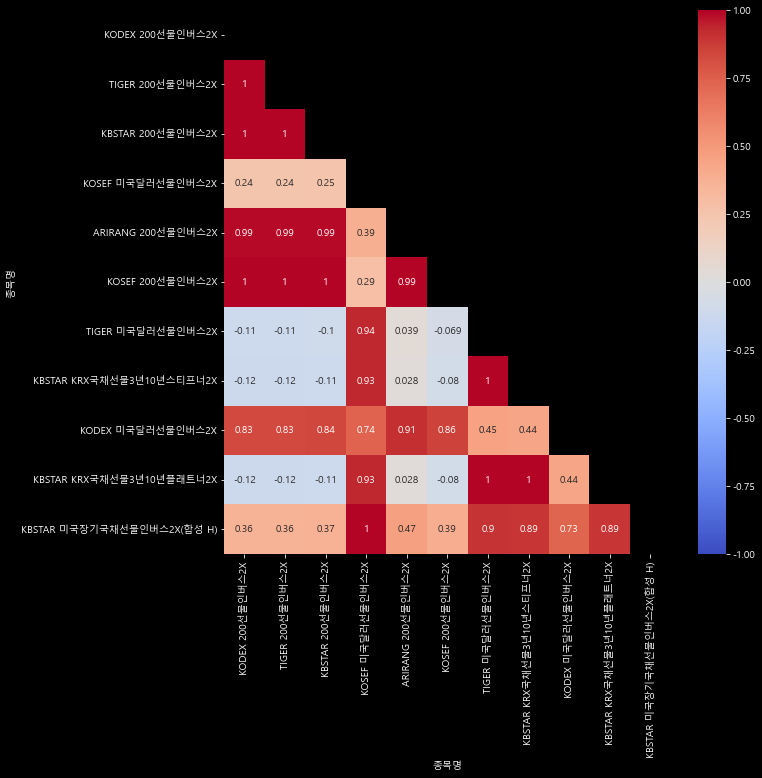

In [23]:
mask_2x = np.triu(np.ones_like(etf_corr_2x))
plt.figure(figsize=(10,10))
sns.heatmap(etf_corr_2x, annot=True, cmap='coolwarm', vmax=1, vmin=-1, mask=mask_2x)